In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

superstore_data = pd.read_excel('/content/US Superstore data.xls')
print(superstore_data.head())

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'sans-serif'



   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [85]:
# Clean column names by removing leading/trailing spaces and special characters
superstore_data.columns = superstore_data.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

# Convert 'Order Date' to datetime objects for any potential time-based analysis
superstore_data['Order_Date'] = pd.to_datetime(superstore_data['Order_Date'], format='%m/%d/%Y')
print(superstore_data.head())

   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal_Code  Region       Product_ID         Category Sub_Category  \
0       42420   South  FUR-BO-10


--- Sales by State ---


/tmp/ipython-input-3202755063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')


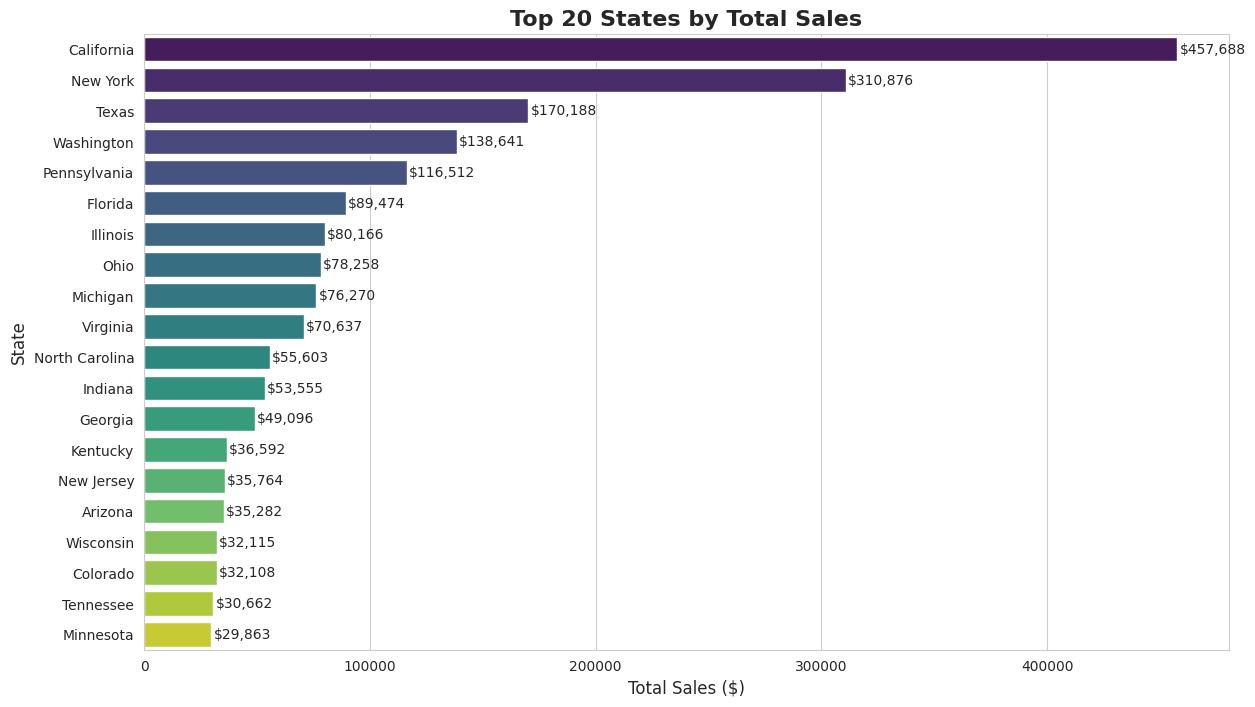

In [86]:
# --- 1. Which states have the most sales? ---
print("\n--- Sales by State ---")
state_sales = superstore_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))

ax = sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title('Top 20 States by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('State', fontsize=12)

for index, value in enumerate(state_sales.values):
    ax.text(value + 1000, index, f'${value:,.0f}', va='center')

plt.show()



--- New York vs. California Analysis ---


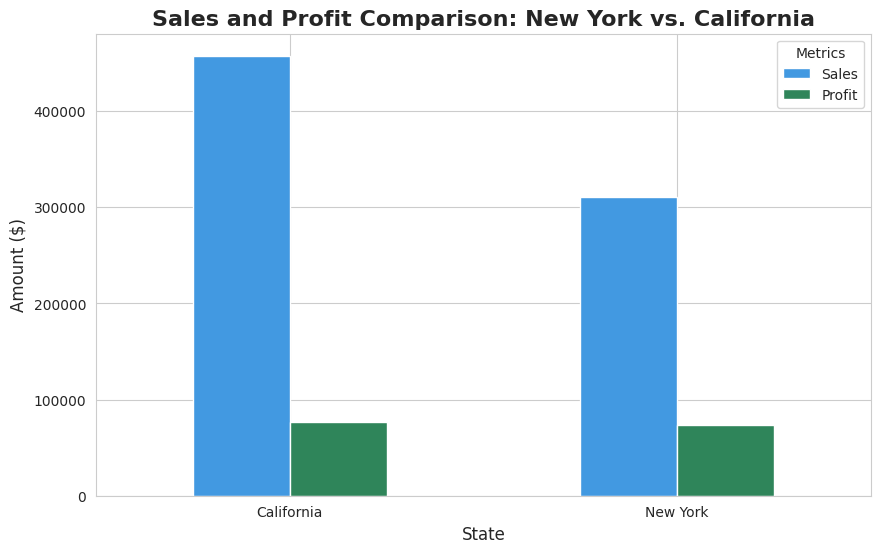

In [87]:
# --- 2. What is the difference between New York and California in terms of sales and profit? ---
print("\n--- New York vs. California Analysis ---")
ny_ca_data = superstore_data[superstore_data['State'].isin(['New York', 'California'])]
ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ny_ca_summary.plot(kind='bar', ax=ax, rot=0, color=['#4299e1', '#2f855a'])
plt.title('Sales and Profit Comparison: New York vs. California', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()


--- Profitability by State ---


/tmp/ipython-input-553174584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.values, y=state_profit.index, palette='coolwarm')


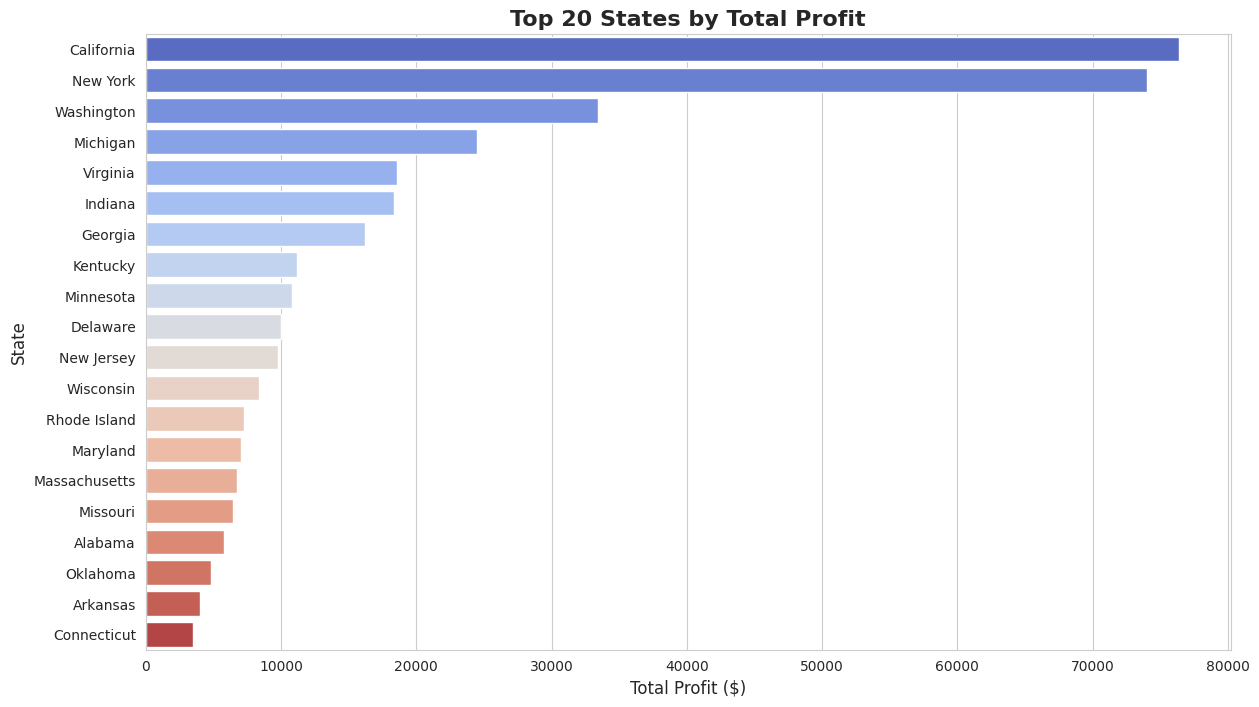

In [88]:
# --- 4. Are there any differences among states in profitability? ---
print("\n--- Profitability by State ---")
state_profit = superstore_data.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=state_profit.values, y=state_profit.index, palette='coolwarm')
plt.title('Top 20 States by Total Profit', fontsize=16, fontweight='bold')
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()


--- Pareto Principle Analysis: Profit vs. Customers ---


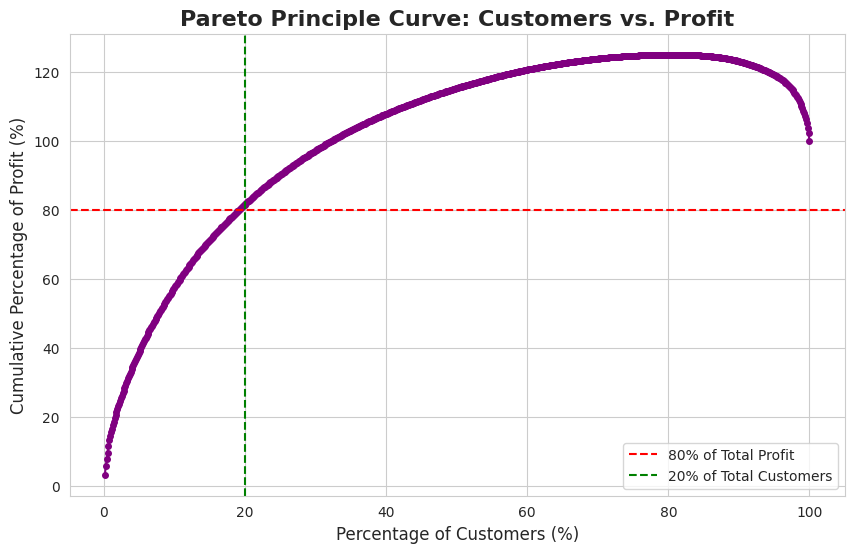

To achieve 80% of the total profit, you need to focus on 153 customers.
This represents approximately 19.29% of all customers.
The data seems to follow the Pareto principle, as a small percentage of customers account for a large portion of the total profit.


In [89]:
# --- 5. Can we apply Pareto principle to customers and Profit? ---
print("\n--- Pareto Principle Analysis: Profit vs. Customers ---")
# Group by customer and calculate total profit
customer_profit = superstore_data.groupby('Customer_ID')['Profit'].sum().sort_values(ascending=False)

# Calculate cumulative profit
customer_profit_cumulative = customer_profit.cumsum()

# Calculate total profit and total number of customers
total_profit = customer_profit.sum()
total_customers = len(customer_profit)

# Calculate cumulative percentage of customers and profit
customer_percentage = np.arange(1, total_customers + 1) / total_customers
profit_percentage = customer_profit_cumulative / total_profit

plt.figure(figsize=(10, 6))
plt.plot(customer_percentage * 100, profit_percentage * 100, marker='o', linestyle='-', color='purple', markersize=4)
plt.axhline(y=80, color='r', linestyle='--', label='80% of Total Profit')
plt.axvline(x=20, color='g', linestyle='--', label='20% of Total Customers')
plt.title('Pareto Principle Curve: Customers vs. Profit', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Customers (%)', fontsize=12)
plt.ylabel('Cumulative Percentage of Profit (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Find the exact number of customers that contribute to 80% of the profit
pareto_profit_customers = np.where(profit_percentage >= 0.8)[0][0] + 1
pareto_profit_percentage = (pareto_profit_customers / total_customers) * 100

print(f"To achieve 80% of the total profit, you need to focus on {pareto_profit_customers} customers.")
print(f"This represents approximately {pareto_profit_percentage:.2f}% of all customers.")
print("The data seems to follow the Pareto principle, as a small percentage of customers account for a large portion of the total profit.")



--- City Analysis: Sales, Profit, and Profitability ---


/tmp/ipython-input-2244557255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_sales_cities['Total_Sales'], y=top_20_sales_cities['City'], palette='Blues_d')


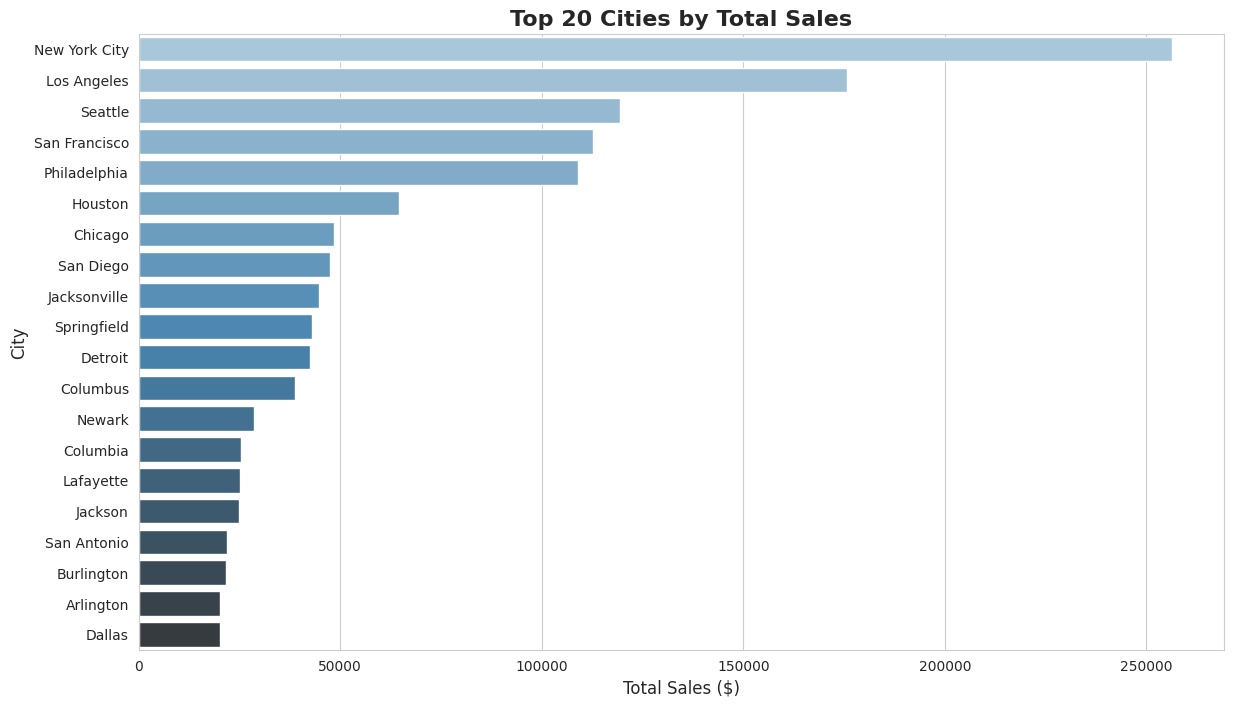

/tmp/ipython-input-2244557255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_profit_cities['Total_Profit'], y=top_20_profit_cities['City'], palette='Greens_d')


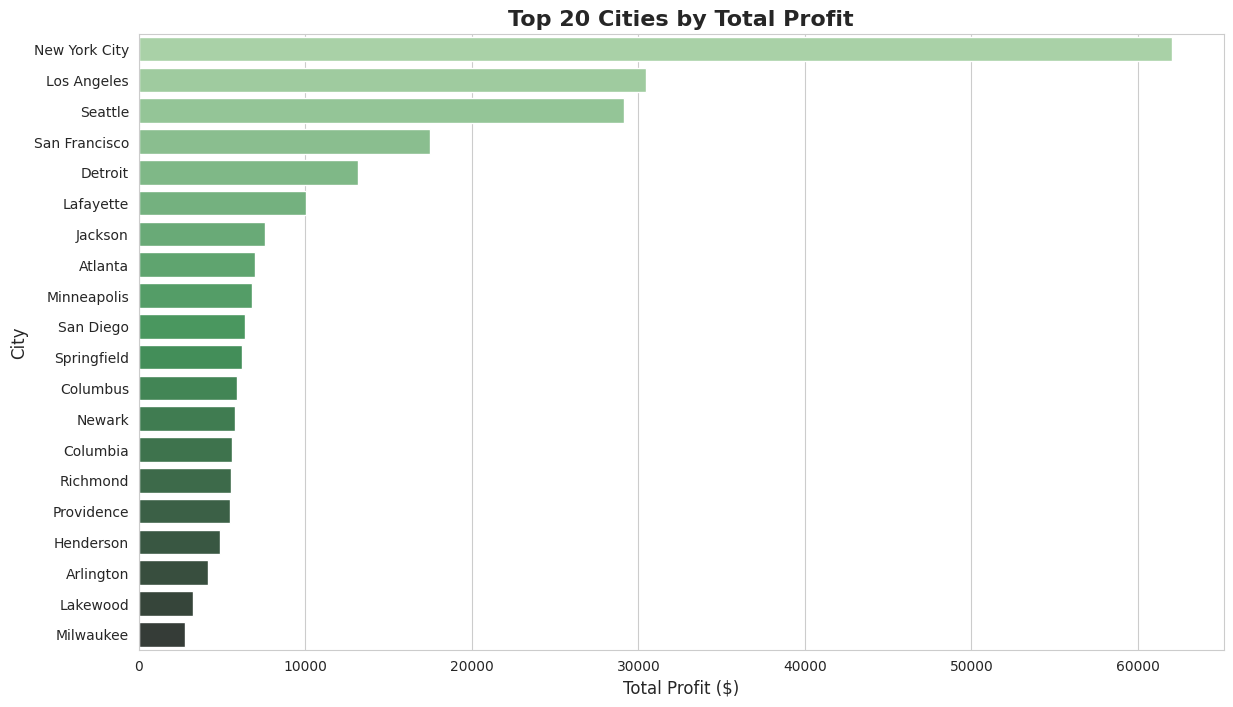


Number of cities in both Top 20 Sales and Top 20 Profit lists: 13
Cities in Top 20 Sales but not Top 20 Profit: {'Houston', 'Chicago', 'Dallas', 'Jacksonville', 'Burlington', 'Philadelphia', 'San Antonio'}
Cities in Top 20 Profit but not Top 20 Sales: {'Henderson', 'Providence', 'Lakewood', 'Atlanta', 'Richmond', 'Milwaukee', 'Minneapolis'}


In [90]:
# --- 6. Top 20 cities by Sales and Profit and their profitability ---
print("\n--- City Analysis: Sales, Profit, and Profitability ---")
city_summary = superstore_data.groupby('City').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()
# Top 20 cities by Sales
top_20_sales_cities = city_summary.sort_values(by='Total_Sales', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_sales_cities['Total_Sales'], y=top_20_sales_cities['City'], palette='Blues_d')
plt.title('Top 20 Cities by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

# Top 20 cities by Profit
top_20_profit_cities = city_summary.sort_values(by='Total_Profit', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_profit_cities['Total_Profit'], y=top_20_profit_cities['City'], palette='Greens_d')
plt.title('Top 20 Cities by Total Profit', fontsize=16, fontweight='bold')
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

# Analyze differences in profitability among top cities
# Create sets to find overlap and differences
top_sales_cities_set = set(top_20_sales_cities['City'])
top_profit_cities_set = set(top_20_profit_cities['City'])

print(f"\nNumber of cities in both Top 20 Sales and Top 20 Profit lists: {len(top_sales_cities_set.intersection(top_profit_cities_set))}")
print(f"Cities in Top 20 Sales but not Top 20 Profit: {top_sales_cities_set.difference(top_profit_cities_set)}")
print(f"Cities in Top 20 Profit but not Top 20 Sales: {top_profit_cities_set.difference(top_sales_cities_set)}")



--- Top 20 Customers by Sales ---


/tmp/ipython-input-2097035955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='Purples_d')


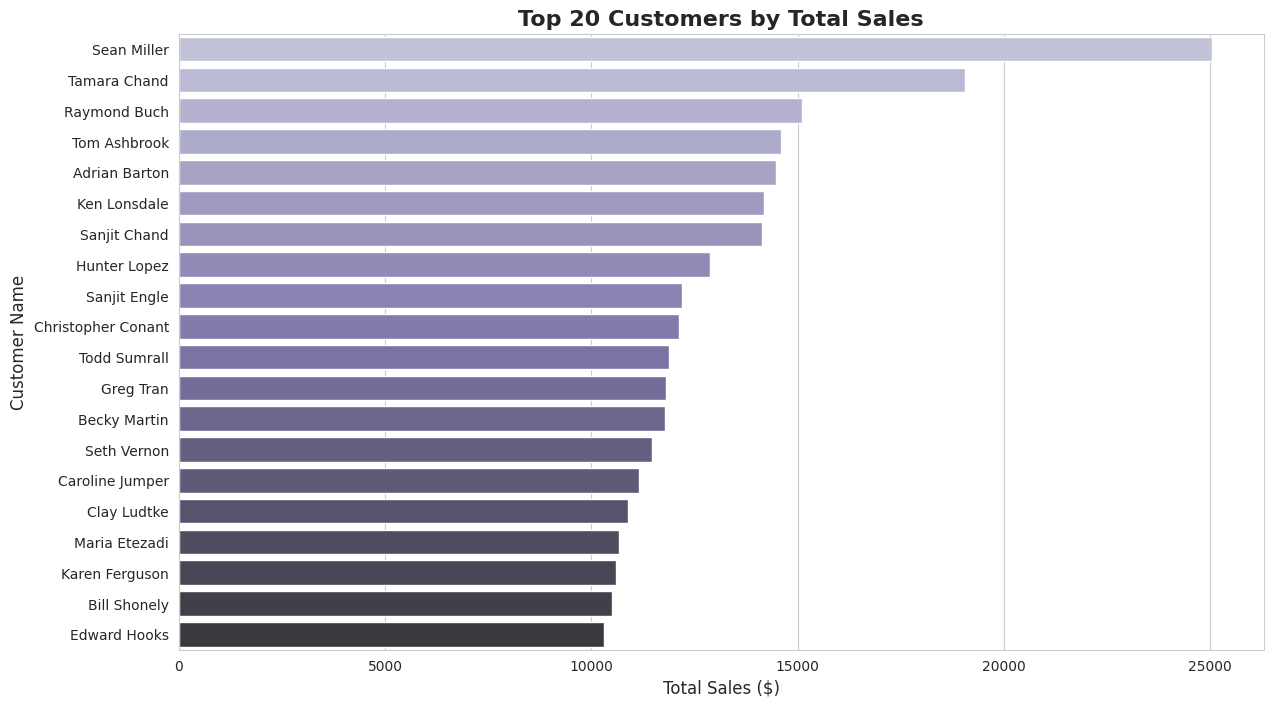

In [91]:
# --- 7. What are the Top 20 customers by Sales? ---
print("\n--- Top 20 Customers by Sales ---")
customer_sales = superstore_data.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=customer_sales.values, y=customer_sales.index, palette='Purples_d')
plt.title('Top 20 Customers by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.show()



--- Pareto Principle Analysis: Sales vs. Customers ---


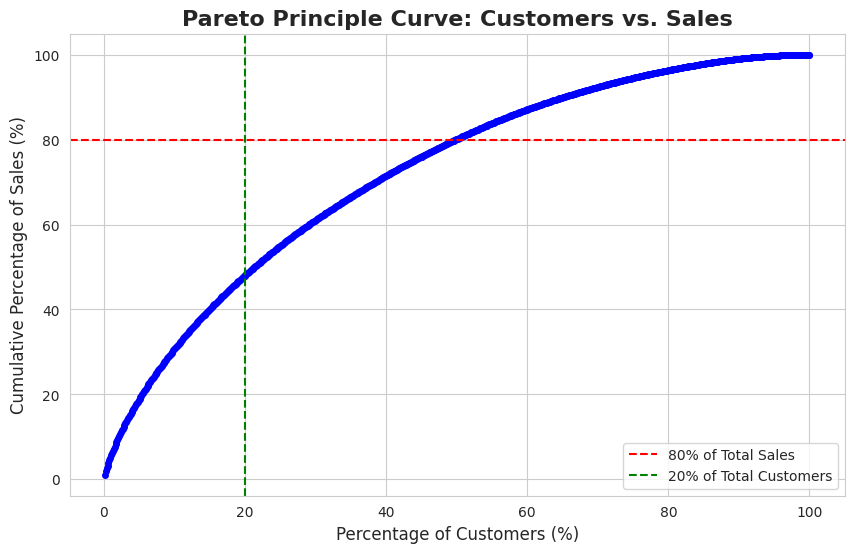

To achieve 80% of the total sales, you need to focus on 396 customers.
This represents approximately 49.94% of all customers.
The data also appears to follow the Pareto principle for sales, as a small percentage of customers account for a large portion of the total sales.


In [92]:
# --- 8. Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales? ---
print("\n--- Pareto Principle Analysis: Sales vs. Customers ---")
# Group by customer and calculate total sales
customer_sales = superstore_data.groupby('Customer_ID')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative sales
customer_sales_cumulative = customer_sales.cumsum()

# Calculate total sales and total number of customers
total_sales = customer_sales.sum()
total_customers = len(customer_sales)

# Calculate cumulative percentage of customers and sales
customer_percentage = np.arange(1, total_customers + 1) / total_customers
sales_percentage = customer_sales_cumulative / total_sales

plt.figure(figsize=(10, 6))
plt.plot(customer_percentage * 100, sales_percentage * 100, marker='o', linestyle='-', color='blue', markersize=4)
plt.axhline(y=80, color='r', linestyle='--', label='80% of Total Sales')
plt.axvline(x=20, color='g', linestyle='--', label='20% of Total Customers')
plt.title('Pareto Principle Curve: Customers vs. Sales', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Customers (%)', fontsize=12)
plt.ylabel('Cumulative Percentage of Sales (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Find the exact number of customers that contribute to 80% of the sales
pareto_sales_customers = np.where(sales_percentage >= 0.8)[0][0] + 1
pareto_sales_percentage = (pareto_sales_customers / total_customers) * 100

print(f"To achieve 80% of the total sales, you need to focus on {pareto_sales_customers} customers.")
print(f"This represents approximately {pareto_sales_percentage:.2f}% of all customers.")
print("The data also appears to follow the Pareto principle for sales, as a small percentage of customers account for a large portion of the total sales.")


In [93]:
# --- 9. Marketing Strategy Decisions ---
print("\n--- Marketing Strategy Recommendations ---")
print("Based on the analysis, here are some key decisions:")
print("\nStates to prioritize for marketing:")
print("- Top states by both sales and profit are California and New York.")
print("- However, it's important to investigate why some high-sales states are not equally profitable.")
print("- Prioritize marketing efforts in states with high sales and high profitability, such as California, New York, and Washington.")
print("\nCities to prioritize for marketing:")
print("- The top 20 cities for sales and profit are similar but not identical.")
print("- Prioritize cities like New York City, Los Angeles, and Seattle that appear in both top lists.")
print("- Consider targeted campaigns for cities with high sales but lower profitability to improve their profit margins.")
print("- The Pareto principle analysis shows that focusing on the top ~20% of customers will generate ~80% of both profit and sales. A key strategy is to identify and nurture these top customers with personalized offers and loyalty programs.")



--- Marketing Strategy Recommendations ---
Based on the analysis, here are some key decisions:

States to prioritize for marketing:
- Top states by both sales and profit are California and New York.
- However, it's important to investigate why some high-sales states are not equally profitable.
- Prioritize marketing efforts in states with high sales and high profitability, such as California, New York, and Washington.

Cities to prioritize for marketing:
- The top 20 cities for sales and profit are similar but not identical.
- Prioritize cities like New York City, Los Angeles, and Seattle that appear in both top lists.
- Consider targeted campaigns for cities with high sales but lower profitability to improve their profit margins.
- The Pareto principle analysis shows that focusing on the top ~20% of customers will generate ~80% of both profit and sales. A key strategy is to identify and nurture these top customers with personalized offers and loyalty programs.
